In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
STATEFP = '47'
COUNTYFPS = ['097', '075', '023', '069', '157', '167', '033', '113', '045', '053', '047']
len(COUNTYFPS)

11

In [3]:
df = gpd.read_file("./data/censusblocks")
df = df[(df['COUNTYFP'].isin(COUNTYFPS)) & (df['STATEFP'] == STATEFP)]

<Axes: >

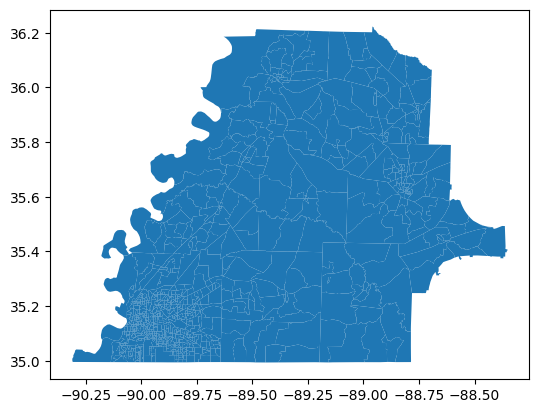

In [4]:
df.plot()

## Find the population per block group

In [8]:
df.query("COUNTYFP == '097'")

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry
11916,47,097,050200,1,1500000US470970502001,470970502001,1,Block Group 1,BG,2560238,0,"POLYGON ((-89.41906 35.87869, -89.41802 35.879..."
29140,47,097,050100,2,1500000US470970501002,470970501002,2,Block Group 2,BG,150177077,11696451,"POLYGON ((-89.95790 35.58726, -89.95659 35.590..."
61877,47,097,050100,1,1500000US470970501001,470970501001,1,Block Group 1,BG,371385588,66967920,"POLYGON ((-89.95834 35.72656, -89.95377 35.731..."
66740,47,097,050504,3,1500000US470970505043,470970505043,3,Block Group 3,BG,3795238,0,"POLYGON ((-89.55981 35.73184, -89.55384 35.745..."
73021,47,097,050505,4,1500000US470970505054,470970505054,4,Block Group 4,BG,1351163,0,"POLYGON ((-89.54616 35.72499, -89.53764 35.743..."
100840,47,097,050200,2,1500000US470970502002,470970502002,2,Block Group 2,BG,23519996,51928,"POLYGON ((-89.39587 35.87731, -89.39409 35.885..."
118508,47,097,050300,2,1500000US470970503002,470970503002,2,Block Group 2,BG,36854404,88387,"POLYGON ((-89.51379 35.88068, -89.50069 35.879..."
122717,47,097,050503,2,1500000US470970505032,470970505032,2,Block Group 2,BG,19234228,0,"POLYGON ((-89.59193 35.77469, -89.59017 35.777..."
142346,47,097,050200,4,1500000US470970502004,470970502004,4,Block Group 4,BG,112774412,185676,"POLYGON ((-89.60900 35.89663, -89.60659 35.896..."
142347,47,097,050600,2,1500000US470970506002,470970506002,2,Block Group 2,BG,38142698,67163,"POLYGON ((-89.64682 35.64829, -89.64438 35.647..."


## Finding the buildings inside each block group.
* For each block group, identify the population for its overseeing census tract.
    * Identify the proportion of the population that would be living in each building.

In [24]:
buildings_df = gpd.read_file("./data/buildings_within_area.geojson")

In [27]:
buildings_df['center'] = buildings_df['geometry'].centroid
buildings_df = buildings_df.set_geometry("center")

/tmp/ipykernel_105367/3413802653.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings_df['center'] = buildings_df['geometry'].centroid


<Axes: >

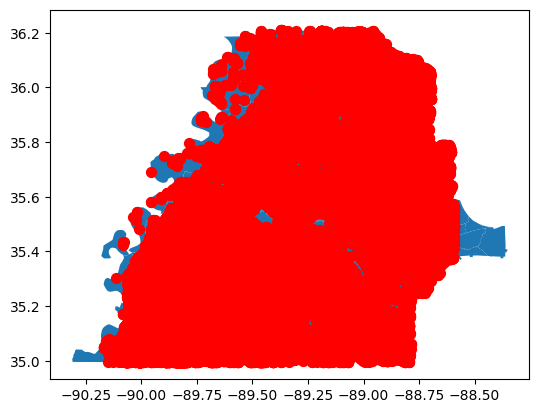

In [28]:
ax = df.plot()
buildings_df.plot(ax=ax, color='r', markersize=50)